<a href="https://colab.research.google.com/github/aadhamashraf/AI-FL24-GP/blob/main/Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Modules Import & Intiation**

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , LogisticRegression
from sklearn.metrics import accuracy_score , confusion_matrix , precision_score , recall_score , f1_score , classification_report , auc , roc_curve , ConfusionMatrixDisplay

plt.style.use("fivethirtyeight")

# **OSEM Framework will Help us deal with our task**
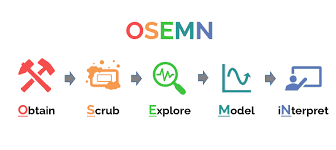

## **Obtain the Data Set**

In [4]:
creditCard = pd.read_csv('/content/drive/MyDrive/CSAI 253 Data Sets/creditcard.csv')

In [5]:
creditCard.shape

(284807, 31)

In [6]:
creditCard.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
creditCard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
creditCard.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [9]:
creditCard.sample(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
246419,153165.0,1.482718,-2.229150,-1.857786,-0.626127,-0.771795,0.199478,-0.229020,-0.042871,0.015329,...,-0.118813,-0.381656,-0.209694,0.374212,-0.148797,1.408087,-0.172594,-0.028668,360.10,0
222061,142802.0,1.711269,-0.792676,-0.895794,0.079618,0.442391,1.897412,-0.800422,0.548962,0.693242,...,0.332768,0.964902,0.113562,-0.887435,-0.432817,0.426029,0.014016,-0.047481,98.00,0
24770,33375.0,-0.829061,0.344202,2.081736,0.595904,-0.140707,0.756045,-0.321097,0.330490,0.527244,...,-0.039463,0.102179,-0.016163,-0.626522,-0.276208,0.501466,-0.086650,0.085158,1.02,0
126333,77985.0,-3.339029,2.330076,0.558414,0.716446,-0.506675,-0.511691,0.487365,-0.249708,0.362949,...,0.181870,0.527313,-0.036222,0.651185,0.477700,-0.409633,-2.236628,-0.261678,22.40,0
64050,50998.0,1.163477,0.014796,0.962294,1.602637,-0.733442,-0.187015,-0.307399,0.034693,0.875251,...,-0.113338,0.014253,-0.099286,0.421246,0.687057,-0.287782,0.056742,0.025940,7.43,0
197891,132225.0,-0.235075,1.351606,-1.720382,-0.084299,1.063682,-1.229153,0.768566,-0.038964,0.470927,...,0.052613,0.655002,-0.079033,-0.669531,-0.238498,-0.176432,-0.129847,-0.379234,1.00,0
74693,55707.0,-1.475339,0.407217,2.089640,-0.162259,-1.819469,1.310367,-1.231456,1.393308,0.904845,...,0.215120,0.747407,-0.258797,-0.224144,0.001076,1.248771,-0.263429,-0.069092,75.00,0
75539,56113.0,1.149351,0.120844,-0.013984,0.896511,0.567840,0.925676,-0.006615,0.161709,-0.129390,...,-0.184233,-0.430857,-0.176452,-1.330371,0.631805,-0.408514,0.040045,0.007261,42.19,0
249702,154537.0,-0.014784,0.506563,-2.654646,-1.077926,2.463463,3.280145,0.349550,1.188917,-0.349807,...,0.396875,0.805367,0.237242,0.614721,-0.184607,-0.132710,-0.092611,-0.044563,132.50,0
99440,67119.0,-6.144651,-0.298211,-1.481719,1.987270,-4.727115,2.784937,0.617555,0.919479,-0.372464,...,0.814944,0.467652,-1.389019,-0.074136,-0.131336,-0.178818,-1.228466,-1.284612,535.20,0


## **Scrubbing the Data Set from**


1.   Missing Records
2.   Duplicates
3. Outliers



**Missing Values Handler**

In [11]:
creditCard.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


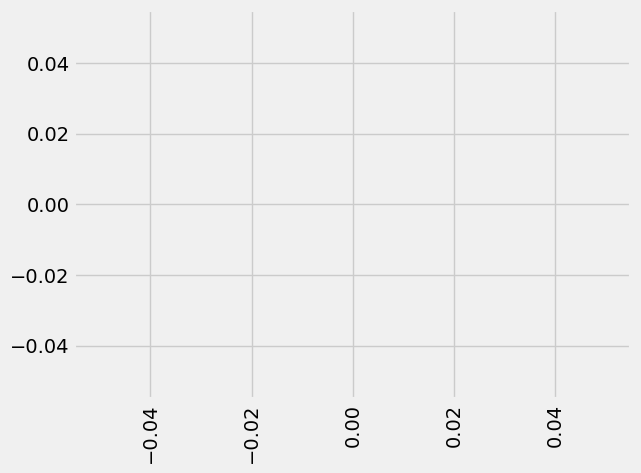

In [12]:
missing = creditCard.isnull().sum()
missing = missing[missing > 0]/creditCard.shape[0]
plt.bar(missing.index, missing.values)
plt.xticks(rotation = 90)
plt.show()
# We can conclude now that there is not any missing values in any column

**Duplicate Records Handler**

In [13]:
print(f"{creditCard.duplicated().sum() / creditCard.shape[0] * 100 :.2f}  % of the data is duplicated The Decision will be Drop out those duplicated records")
creditCard.drop_duplicates(inplace=True)

0.38  % of the data is duplicated The Decision will be Drop out those duplicated records


In [14]:
creditCard[creditCard.duplicated()]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class


##### **Outliers Handler**

*We can now create conclusion that the Z score for the column that will exceed 3 have outliers*

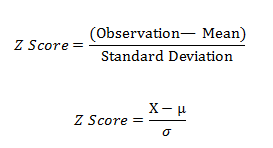

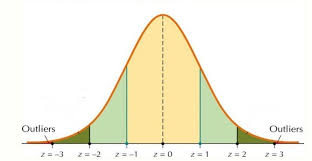

In [15]:
standered_Z_Score_Fetcher ={}
for column in creditCard.columns:
  standered_Z_Score_Fetcher[column] = (creditCard[column] - creditCard[column].mean()) / creditCard[column].std()

In [16]:
standered_Z_Score_Fetcher

{'Time': 0        -1.996819
 1        -1.996819
 2        -1.996798
 3        -1.996798
 4        -1.996777
             ...   
 284802    1.642233
 284803    1.642254
 284804    1.642275
 284805    1.642275
 284806    1.642359
 Name: Time, Length: 283726, dtype: float64,
 'V1': 0        -0.701081
 1         0.608791
 2        -0.700335
 3        -0.499064
 4        -0.597605
             ...   
 284802   -6.102092
 284803   -0.379207
 284804    0.982352
 284805   -0.126465
 284806   -0.276860
 Name: V1, Length: 283726, dtype: float64,
 'V2': 0        -0.041687
 1         0.164137
 2        -0.811335
 3        -0.109972
 4         0.535538
             ...   
 284802    6.118845
 284803   -0.030938
 284804   -0.180433
 284805    0.324659
 284806   -0.112709
 Name: V2, Length: 283726, dtype: float64,
 'V3': 0         1.680098
 1         0.109279
 2         1.174268
 3         1.187381
 4         1.025468
             ...   
 284802   -6.519861
 284803    1.347810
 284804   -2.155029
 28

## **Exploring the Data Set Using Visualization Modules**

**As Mentioned in the Task Description there is imbalance in the Target Column**

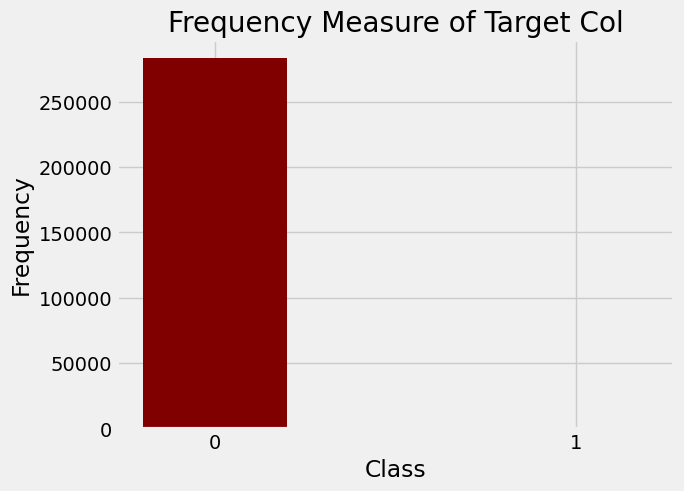

In [20]:
class_counts = creditCard['Class'].value_counts()

plt.bar(class_counts.index, class_counts.values, color='maroon', width=0.4)

plt.xlabel('Class')
plt.xticks([0 , 1])
plt.ylabel('Frequency')
plt.title('Frequency Measure of Target Col')

plt.show()
# print(class_counts.values[1] / class_counts.values[0])

**Plotting the Distribution of All the Data**

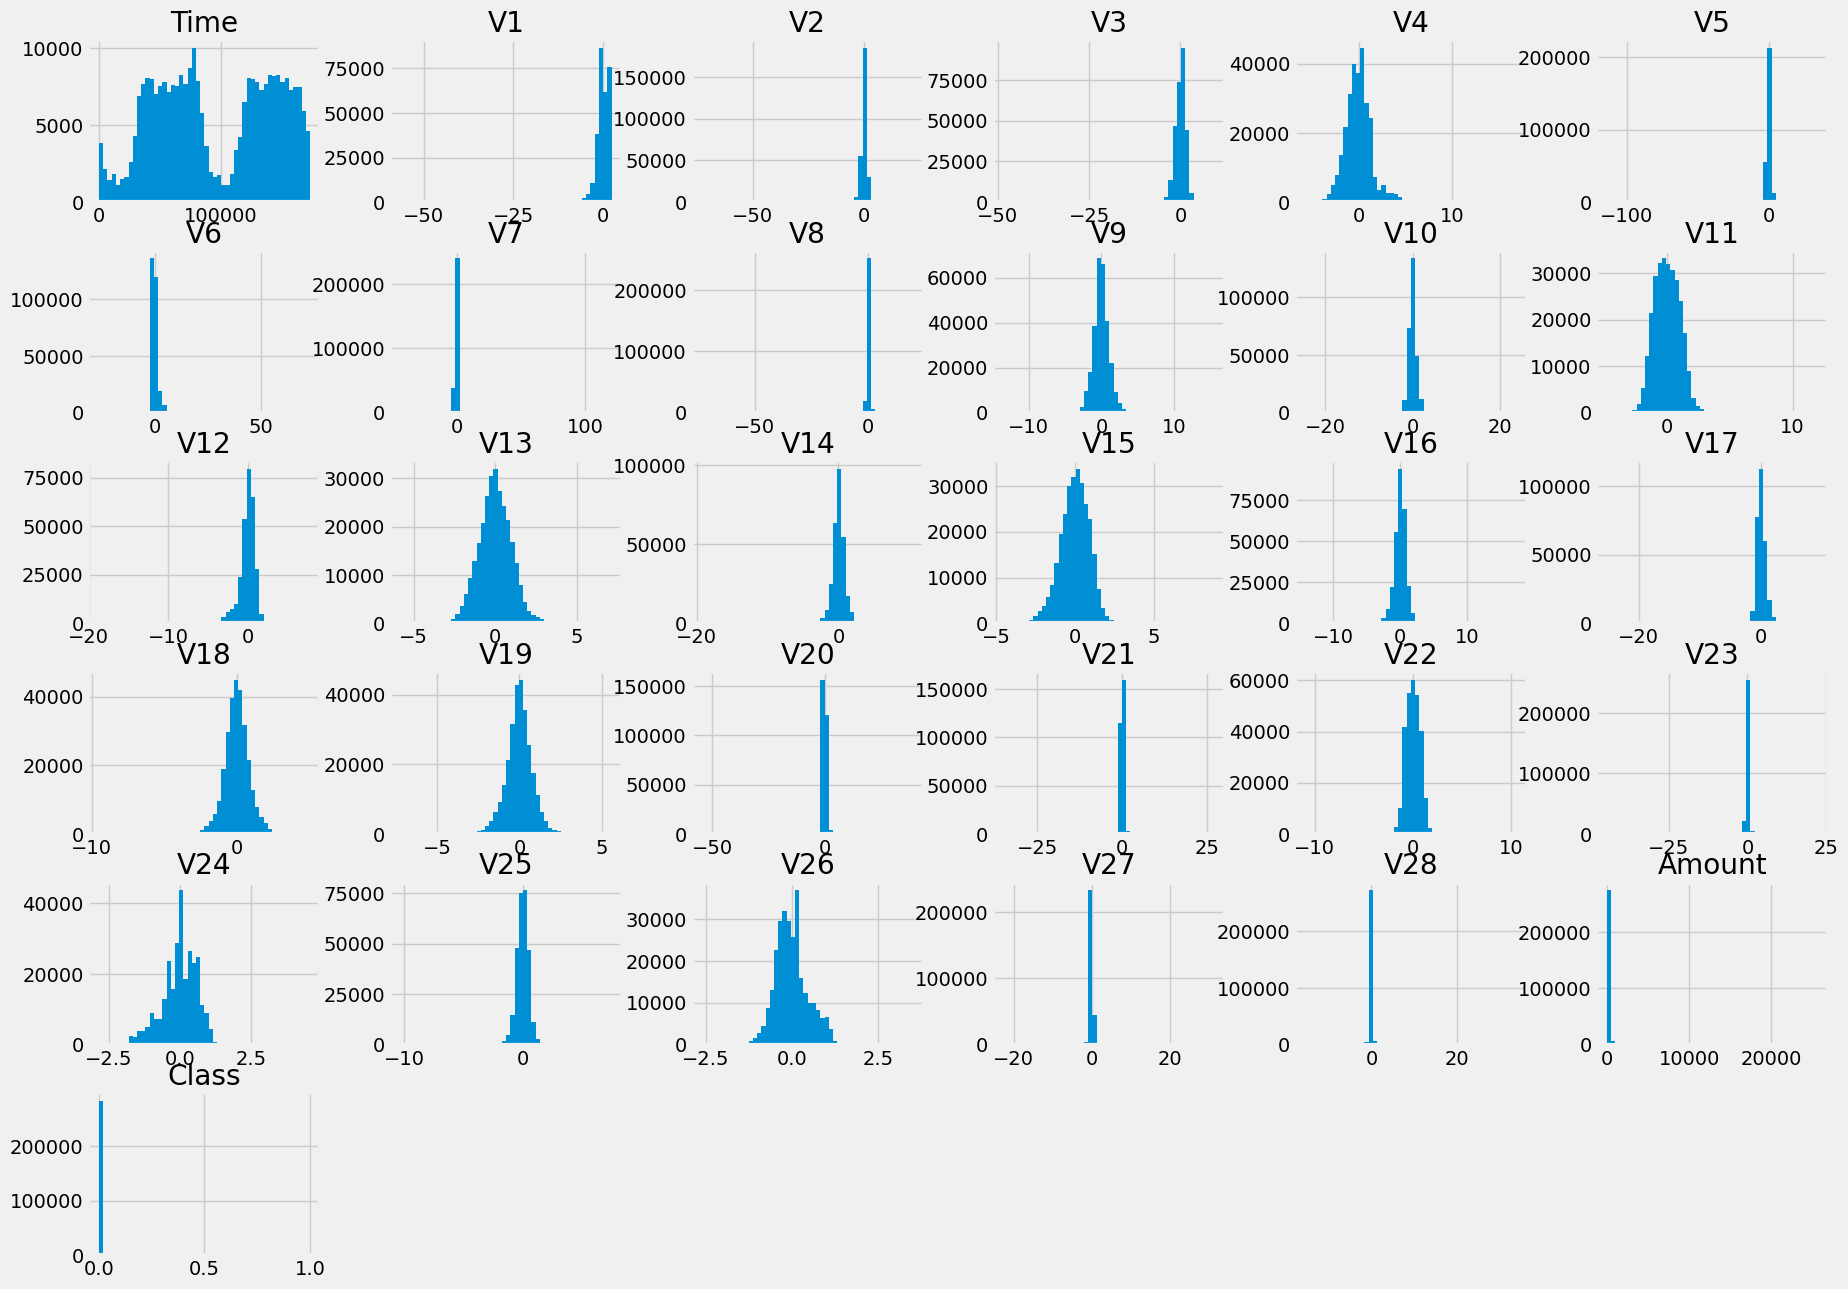

In [21]:
creditCard.hist(bins=50, figsize=(20,15))
plt.show()


**Correlation Matrix**

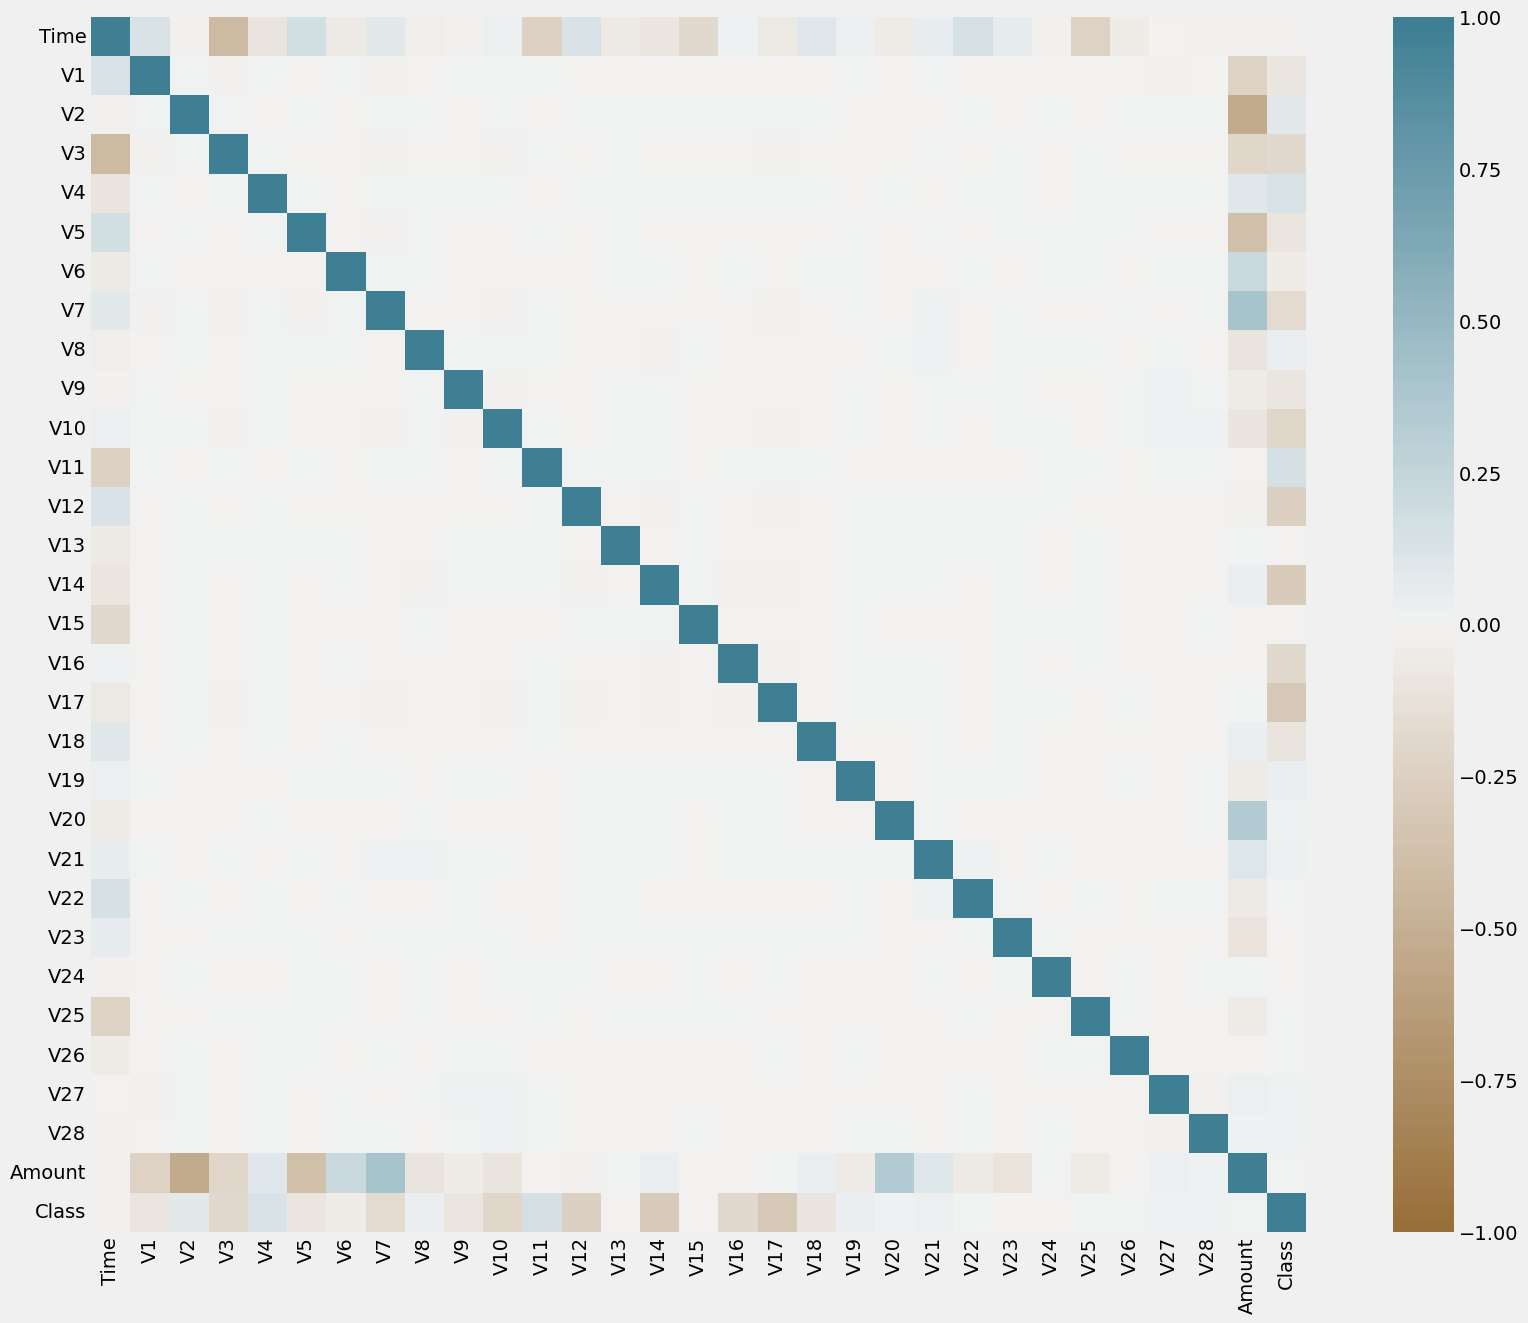

In [22]:
corr_matrix = creditCard.corr()
plt.subplots(figsize=(20,15))
ax = sns.heatmap(
    corr_matrix,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(50, 220, n=200),
    square=True
)

# **Using the data for classfication problem**

###**Let's Try What will happen without fixing the imbalancing**

In [23]:
X = creditCard.drop('Class', axis=1)
y = creditCard['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

####**KNN Classfier**

In [ ]:
accuracy_score_K = []
confusion_matrix_K = []
precision_score_K = []
recall_score_K = []
f1_score_K = []
classification_report_K = []
auc_K = []
roc_curve_K = []

for k in range(1,15):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train,y_train)
  y_pred = knn.predict(X_test)
  accuracy_score_K.append(accuracy_score(y_test, y_pred))
  confusion_matrix_K.append(confusion_matrix(y_test, y_pred))
  precision_score_K.append(precision_score(y_test, y_pred))
  recall_score_K.append(recall_score(y_test, y_pred))
  f1_score_K.append(f1_score(y_test, y_pred))
  classification_report_K.append(classification_report(y_test, y_pred))
  # auc_K.append(auc(y_test, y_pred))
  # roc_curve_K.append(roc_curve(y_test, y_pred))

In [33]:
KNN_Imbalnced_Results = pd.DataFrame({
    'K Value' : range(1,15),
    'Accuracy Score' : accuracy_score_K,
    'Confusion Matrix' : confusion_matrix_K,
    'Precision Score' : precision_score_K,
    'Recall Score' : recall_score_K,
    'F1 Score' : f1_score_K,
    'Classification Report' : classification_report_K,
})

#####**Classfication Task Metrics**

**Accuracy Score Over K'S**

In [ ]:
sns.lineplot(x="K Value", y="Accuracy Score", data=KNN_Imbalnced_Results)

**Precision Score Over K'S**

<Axes: xlabel='K Value', ylabel='Precision Score'>

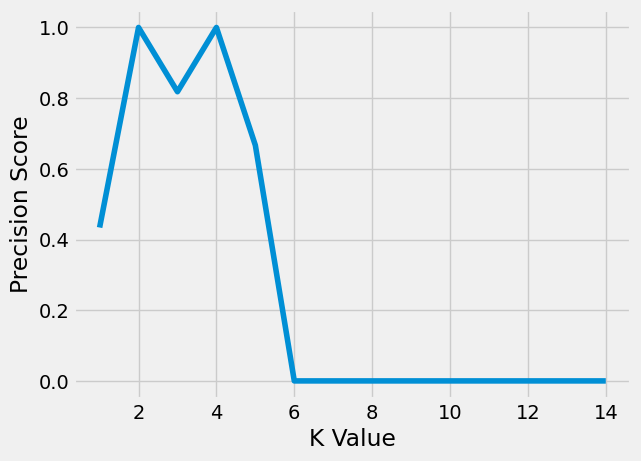

In [36]:
sns.lineplot(x="K Value", y="Precision Score", data=KNN_Imbalnced_Results)

**Recall Score Over K'S**

<Axes: xlabel='K Value', ylabel='Recall Score'>

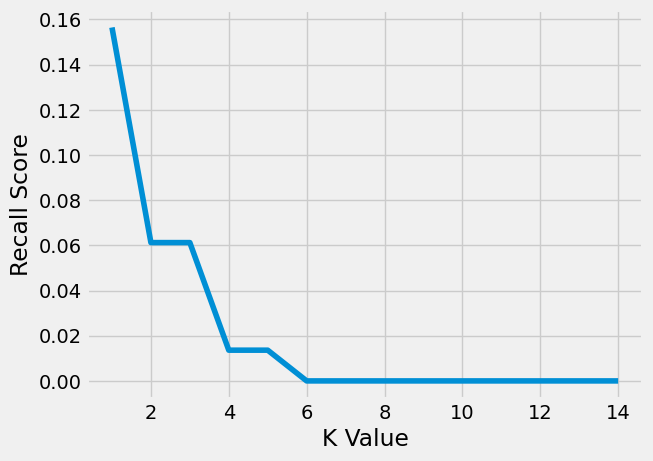

In [37]:
sns.lineplot(x="K Value", y="Recall Score", data=KNN_Imbalnced_Results)

**F1 Score Over K'S**

<Axes: xlabel='K Value', ylabel='F1 Score'>

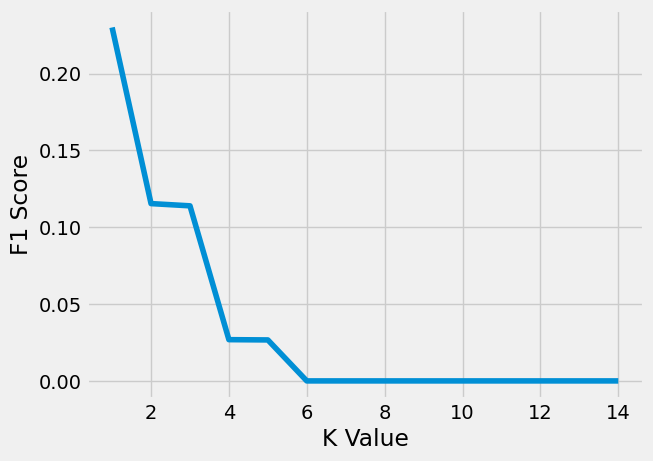

In [38]:
sns.lineplot(x="K Value", y="F1 Score", data=KNN_Imbalnced_Results)

#####**Classfication Report**

In [42]:
for i in range(KNN_Imbalnced_Results.shape[0]):
  print(f"K = {KNN_Imbalnced_Results['K Value'][i]}")
  print(KNN_Imbalnced_Results['Classification Report'][i])
  print(40 * " - ")

K = 1
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93483
           1       0.43      0.16      0.23       147

    accuracy                           1.00     93630
   macro avg       0.72      0.58      0.61     93630
weighted avg       1.00      1.00      1.00     93630

K = 2
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93483
           1       1.00      0.06      0.12       147

    accuracy                           1.00     93630
   macro avg       1.00      0.53      0.56     93630
weighted avg       1.00      1.00      1.00     93630

K = 3
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93483
           1       0.82      0.06      0.11       147

    accuracy                           1.00     93630
   macro avg       0.91      0.53      0.56     93630
weighted avg       1.00      1.00      1.00     93630

K

#####**Confusion Matrix**

K = 1


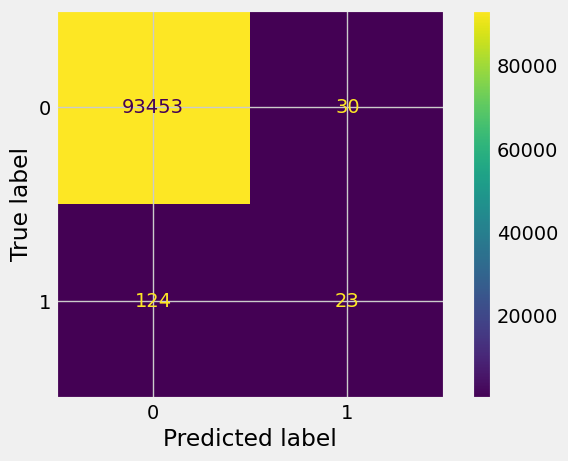

 -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
K = 2


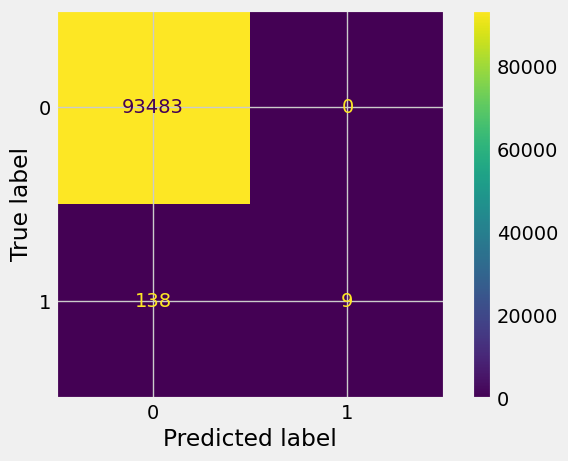

 -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
K = 3


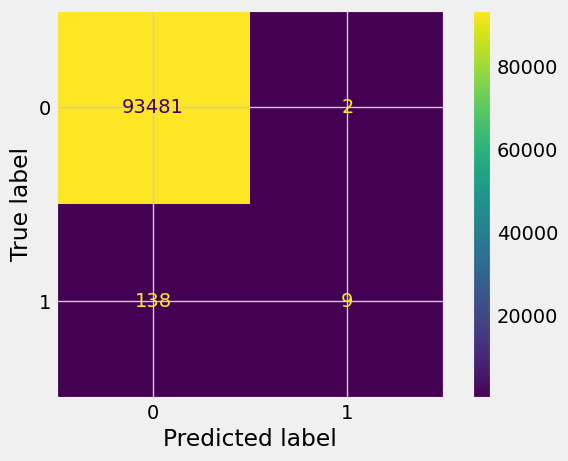

 -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
K = 4


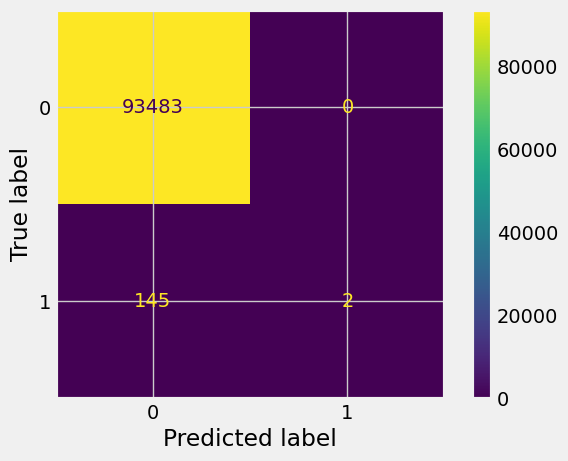

 -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
K = 5


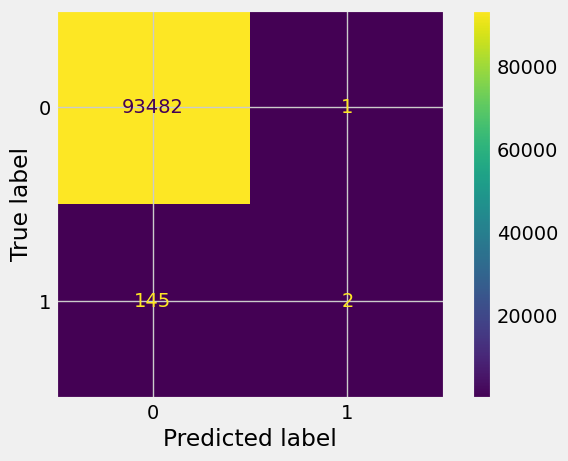

 -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
K = 6


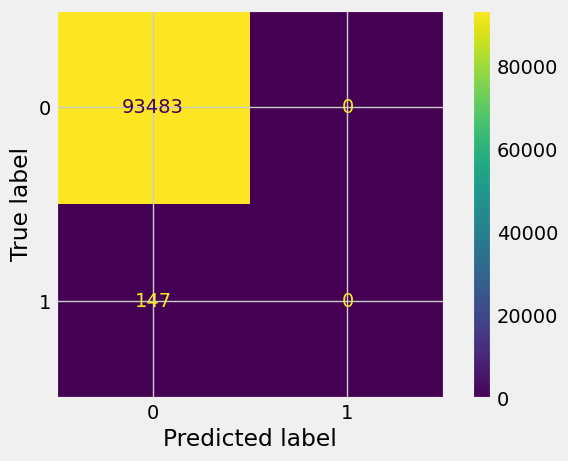

 -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
K = 7


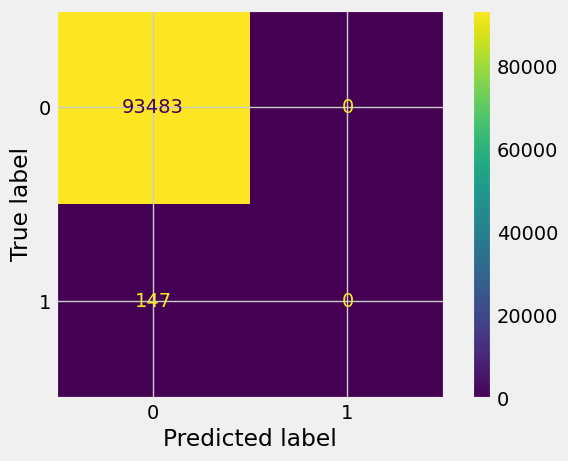

 -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
K = 8


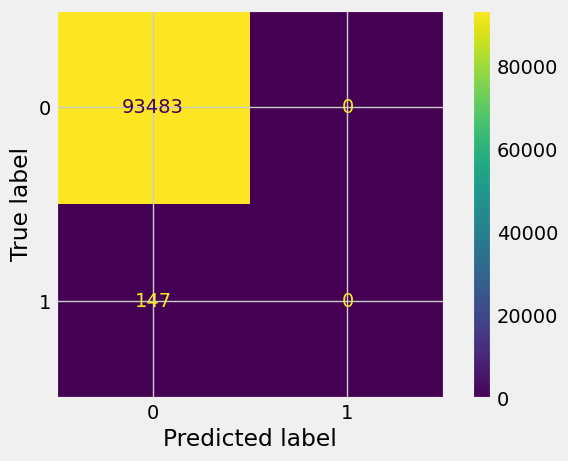

 -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
K = 9


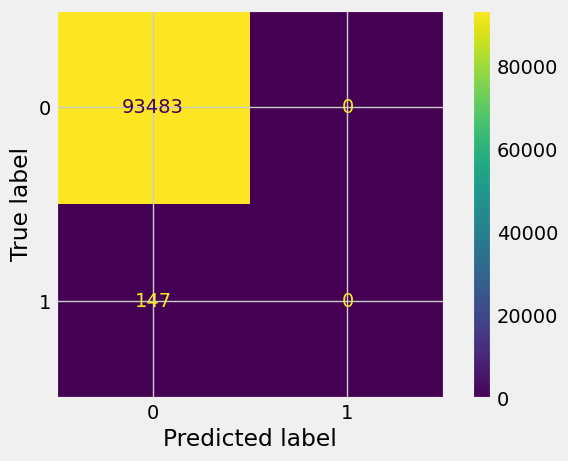

 -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
K = 10


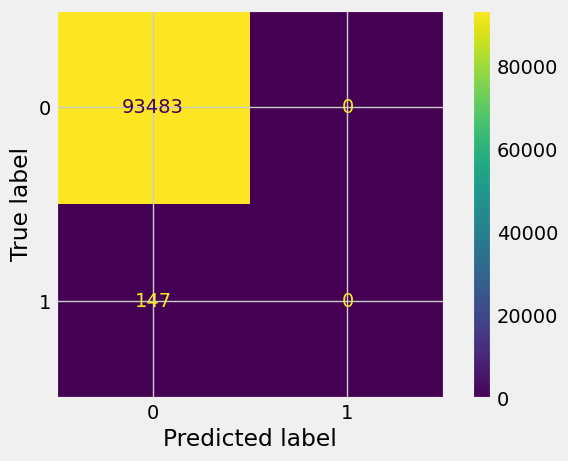

 -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
K = 11


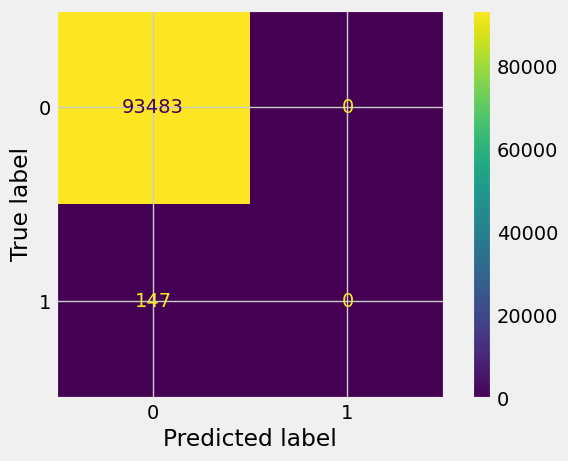

 -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
K = 12


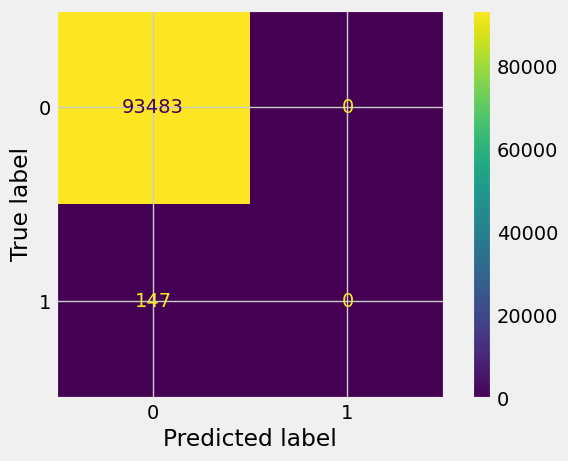

 -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
K = 13


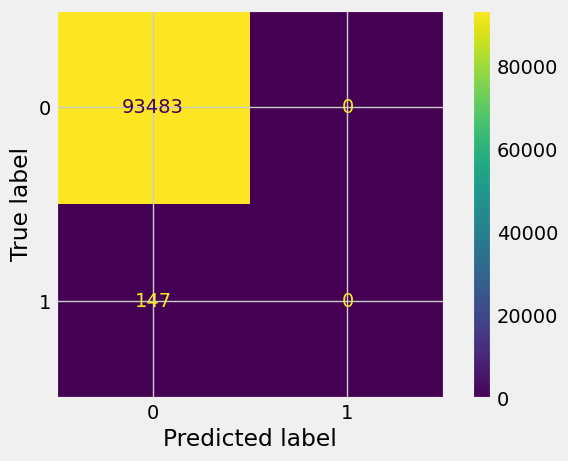

 -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
K = 14


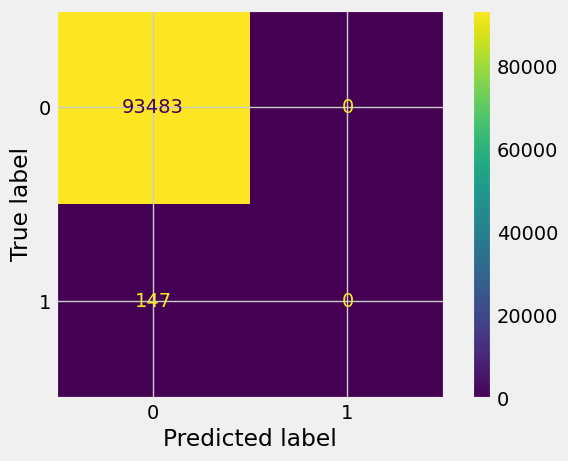

 -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 


In [45]:
for i in range(KNN_Imbalnced_Results.shape[0]):
  print(f"K = {KNN_Imbalnced_Results['K Value'][i]}")
  cm_display = ConfusionMatrixDisplay(confusion_matrix = KNN_Imbalnced_Results['Confusion Matrix'][i], display_labels = [0, 1])
  cm_display.plot()
  plt.show()
  print(40 * " - ")

####**Logistic Regression**

Accuracy Score : 0.9991562533376055
Precision Score : 0.8777777777777778
Recall Score : 0.5374149659863946
F1 Score : 0.6666666666666666
Classification Report :               precision    recall  f1-score   support

           0       1.00      1.00      1.00     93483
           1       0.88      0.54      0.67       147

    accuracy                           1.00     93630
   macro avg       0.94      0.77      0.83     93630
weighted avg       1.00      1.00      1.00     93630



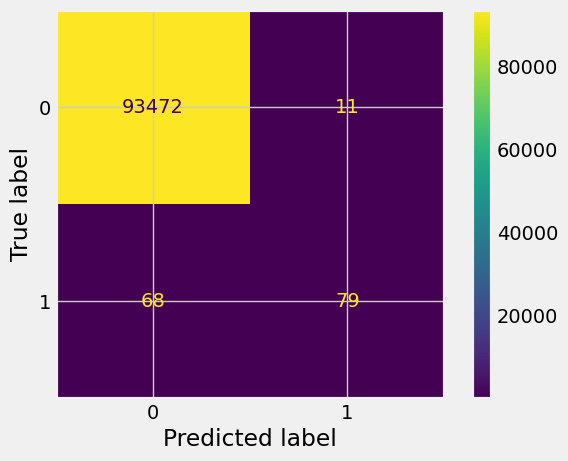

In [47]:
model = LogisticRegression(max_iter = 5000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print (f"Accuracy Score : {accuracy_score(y_test, y_pred)}")
print (f"Precision Score : {precision_score(y_test, y_pred)}")
print (f"Recall Score : {recall_score(y_test, y_pred)}")
print (f"F1 Score : {f1_score(y_test, y_pred)}")
print (f"Classification Report : {classification_report(y_test, y_pred)}")
# print (f"AUC : {auc(y_test, y_pred)}")
# print (f"ROC Curve : {roc_curve(y_test, y_pred)}")
# print (f"Confusion Matrix : {confusion_matrix(y_test, y_pred)}")
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred), display_labels = [0, 1])
cm_display.plot()
plt.show()

###**Under Sampling the Imbalanced Feature**
https://imbalanced-learn.org/stable/

| Technique                   | When to Use | Status | Assigned to |
|-----------------------------|-------------|--------|-------------|
| Random Under Sampling (RUS) |             |    ✅    | Adham            |
| Cluster Centriods           |             |        |             |
| Tomek Links                 |             |        |             |

####**Random Under Sampling**

**KNN Classfier**

**Logistic Regression**

####**Cluster Centroids**



**KNN Classfier**

**Logistic Regression**

####**Tomek Links**

**KNN Classfier**

**Logistic Regression**